In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
print("GPUs:", tf.config.list_physical_devices('GPU'))

!pip install csbdeep

Mounted at /content/drive
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE

In [ ]:
(X,Y), (X_val,Y_val), axes = load_training_data('/content/drive/MyDrive/lattice_data/fixed/CARE/raw_data/for_training_5ms/patches/patches.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 180
number of validation images:	 20
image size (3D):		 (64, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


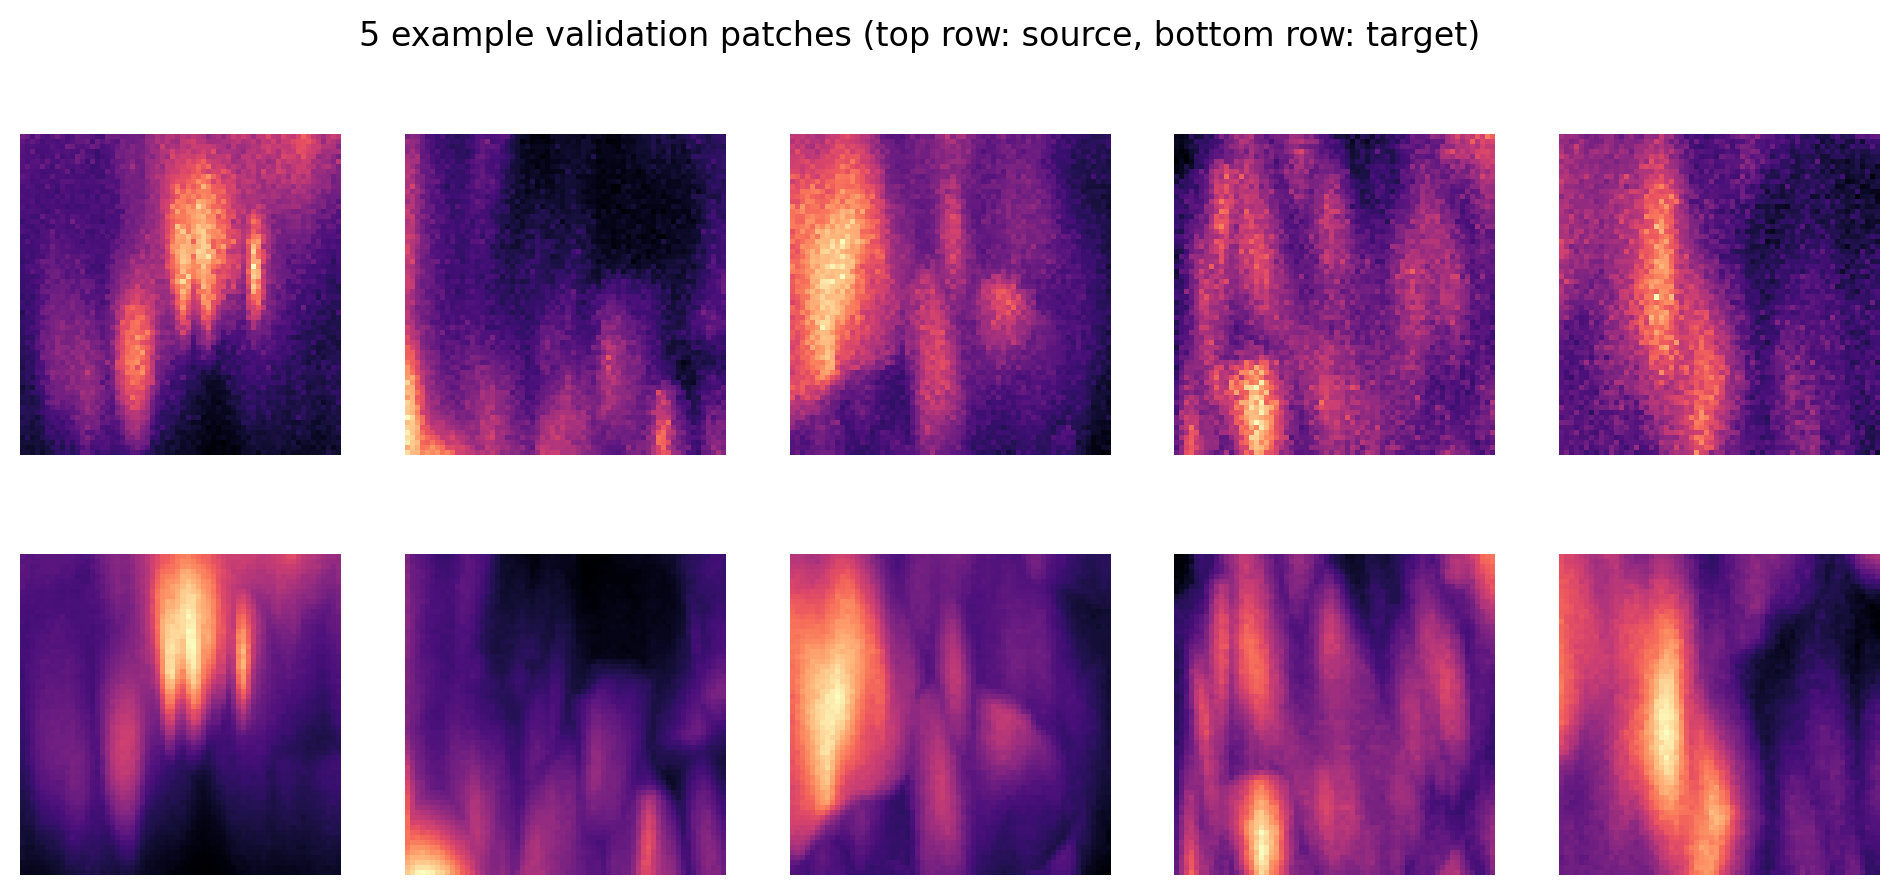

In [ ]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

In [ ]:
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=400, train_batch_size=20, probabilistic=True)
print(config)
vars(config)

Config(n_dim=3, axes='ZYXC', n_channel_in=1, n_channel_out=1, train_checkpoint='weights_best.h5', train_checkpoint_last='weights_last.h5', train_checkpoint_epoch='weights_now.h5', probabilistic=True, unet_residual=True, unet_n_depth=2, unet_kern_size=3, unet_n_first=32, unet_last_activation='linear', unet_input_shape=(None, None, None, 1), train_loss='laplace', train_epochs=100, train_steps_per_epoch=400, train_learning_rate=0.0004, train_batch_size=20, train_tensorboard=True, train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0})


{'n_dim': 3,
 'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'train_checkpoint': 'weights_best.h5',
 'train_checkpoint_last': 'weights_last.h5',
 'train_checkpoint_epoch': 'weights_now.h5',
 'probabilistic': True,
 'unet_residual': True,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, None, 1),
 'train_loss': 'laplace',
 'train_epochs': 100,
 'train_steps_per_epoch': 400,
 'train_learning_rate': 0.0004,
 'train_batch_size': 20,
 'train_tensorboard': True,
 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}

In [ ]:

#!tensorboard --logdir=.

model = CARE(config, 'my_model', basedir='models')
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/csbdeep/models/base_model.py:203: UserWarning: output path for model already exists, files may be overwritten: /content/models/my_model
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - loss: -0.5843 - mae: 0.0522 - mse: 0.0066

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input
Received: inputs=('Tensor(shape=(1, 64, 64, 64, 1))',)
  warnings.warn(msg)


400/400 ━━━━━━━━━━━━━━━━━━━━ 361s 758ms/step - loss: -0.5858 - mae: 0.0522 - mse: 0.0066 - val_loss: -1.5438 - val_mae: 0.0308 - val_mse: 0.0025 - learning_rate: 4.0000e-04
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 302s 755ms/step - loss: -1.7441 - mae: 0.0321 - mse: 0.0033 - val_loss: -1.8780 - val_mae: 0.0297 - val_mse: 0.0023 - learning_rate: 4.0000e-04
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 302s 755ms/step - loss: -1.8938 - mae: 0.0294 - mse: 0.0031 - val_loss: -2.0141 - val_mae: 0.0274 - val_mse: 0.0022 - learning_rate: 4.0000e-04
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 302s 755ms/step - loss: -1.9051 - mae: 0.0294 - mse: 0.0030 - val_loss: -1.7293 - val_mae: 0.0340 - val_mse: 0.0027 - learning_rate: 4.0000e-04
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 302s 755ms/step - loss: -1.9205 - mae: 0.0291 - mse: 0.0030 - val_loss: -1.8667 - val_mae: 0.0302 - val_mse: 0.0023 - learning_rate: 4.0000e-04
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 302s 754ms/step - loss: -1.9851 - mae: 0.0278 

['learning_rate', 'loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


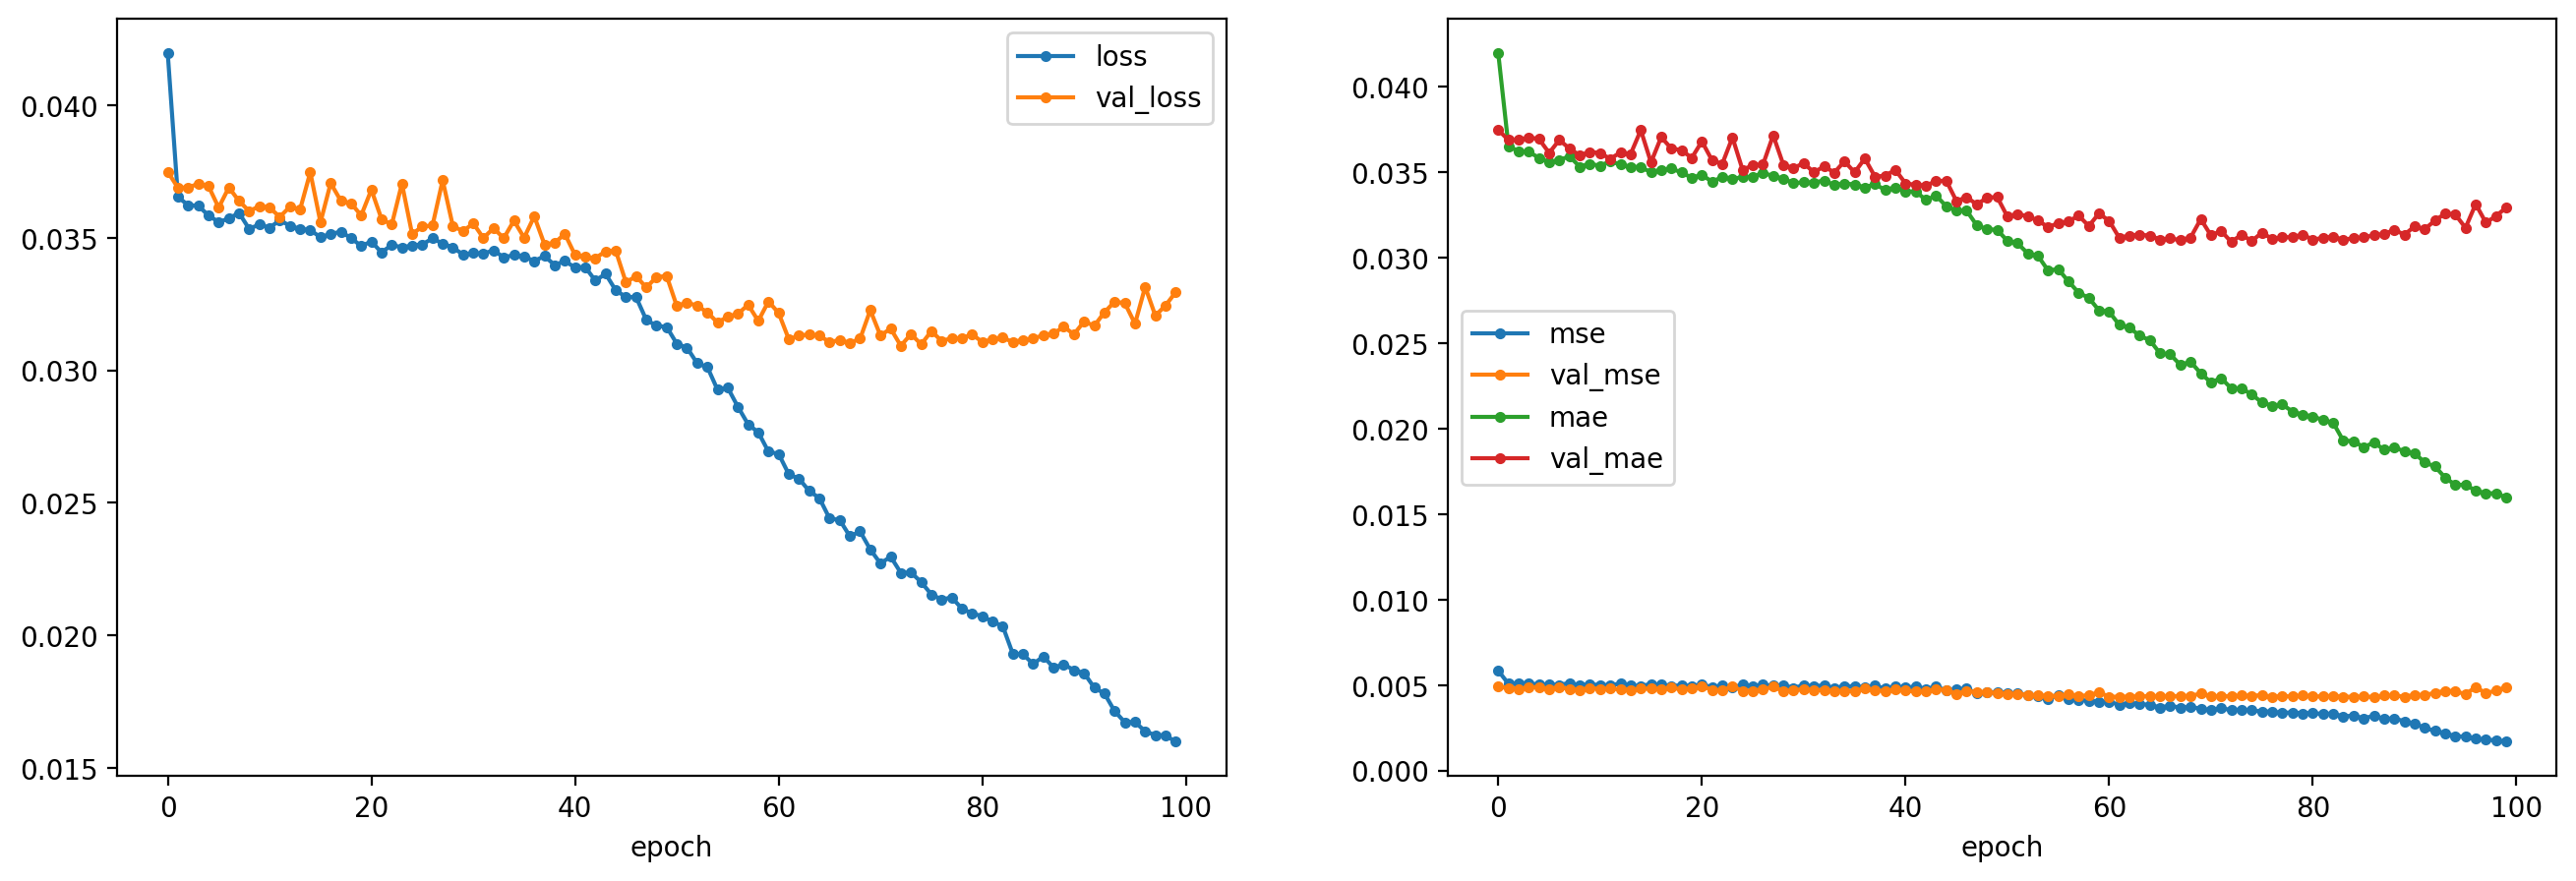

In [ ]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


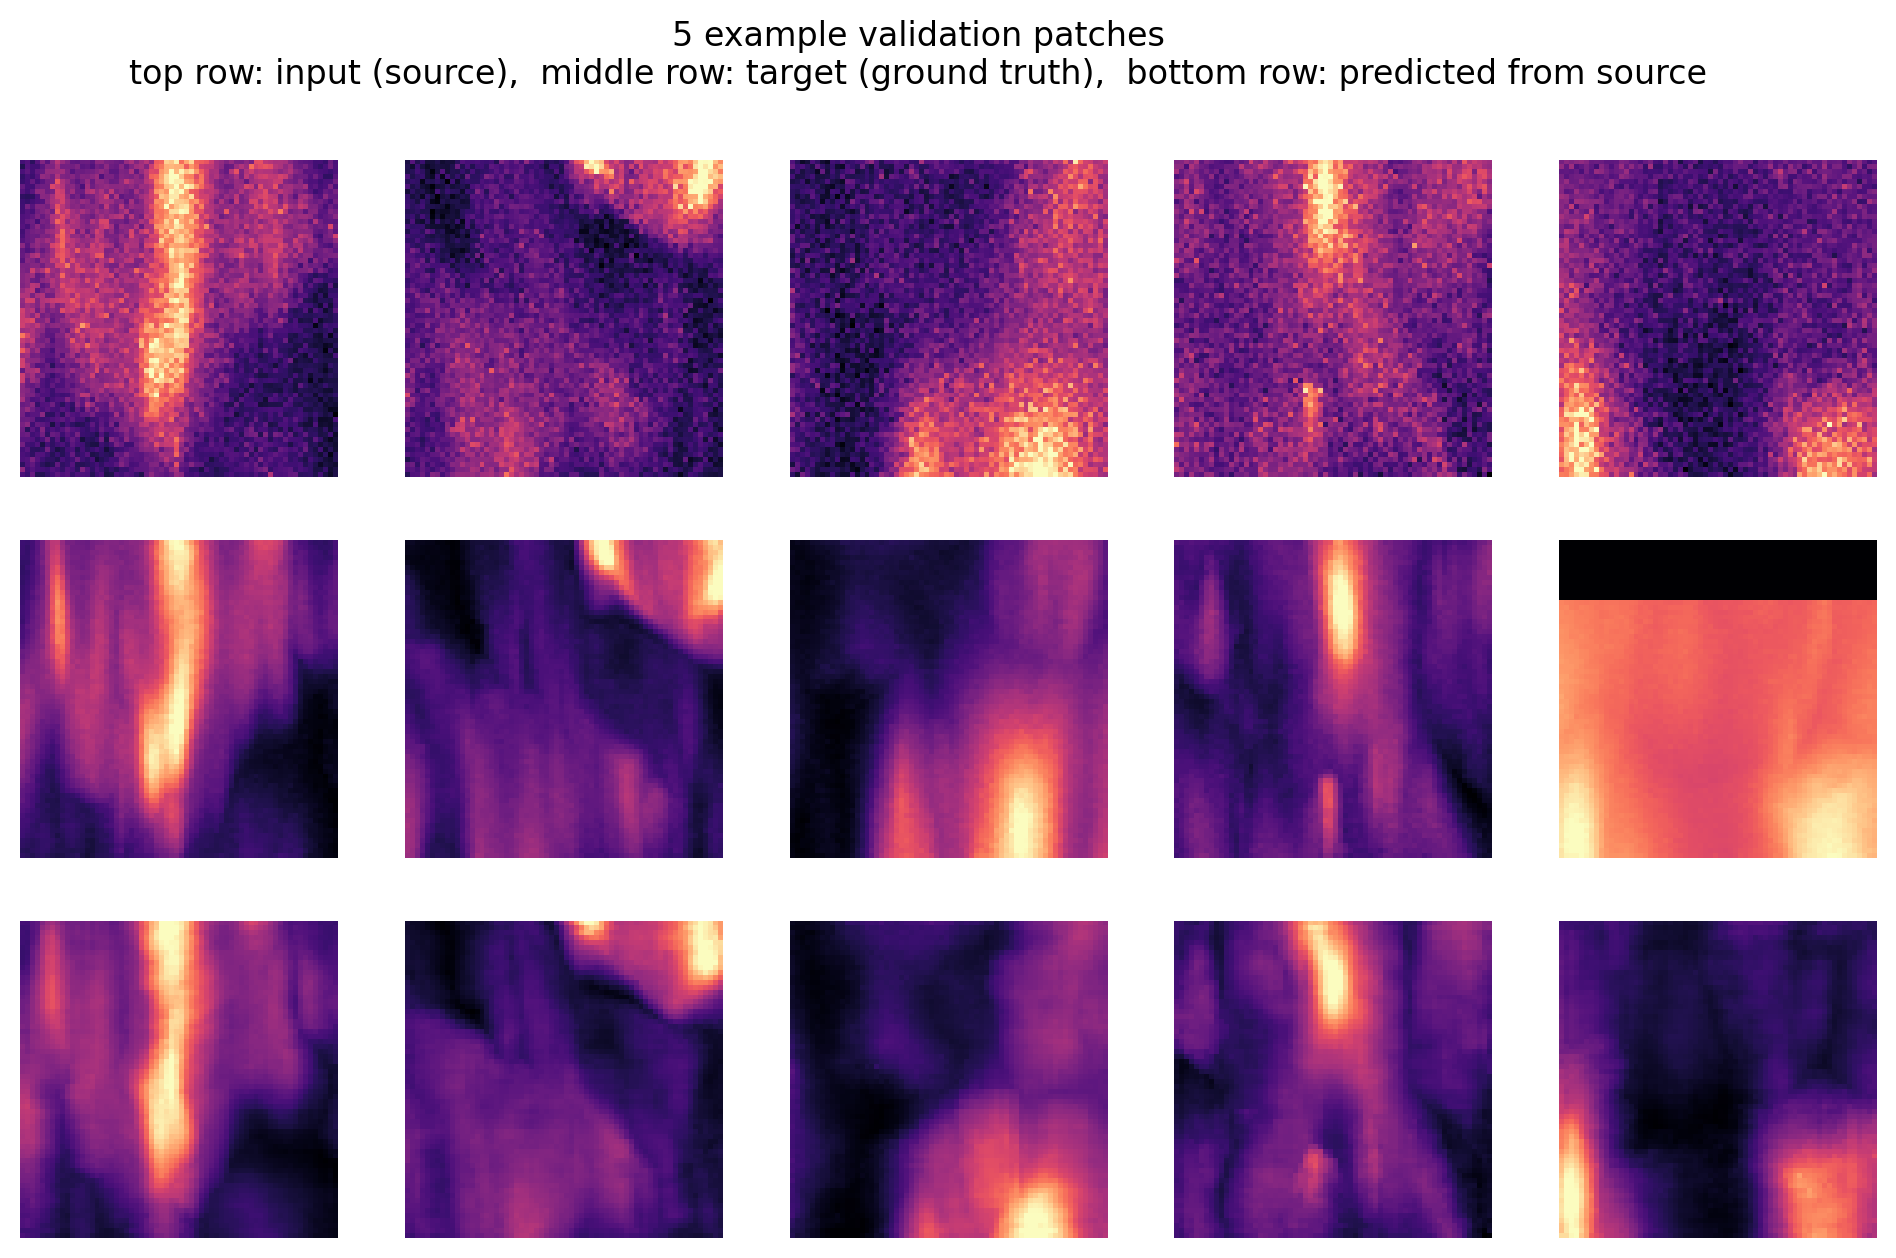

In [ ]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'
             'top row: input (source),  '
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');
